## CHALLENGE 5

## challenge1
- Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross)

In [72]:
from __future__ import print_function
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
% matplotlib inline
from sklearn.model_selection import train_test_split

In [73]:
df=pd.read_csv('/Users/andreewerner/Desktop/2013_movies.csv')

In [74]:
df.shape

(100, 7)

In [75]:
# create feature matrix X and target y 
X=pd.DataFrame()
y=pd.DataFrame()

In [76]:
# OLS model summary 
X['constant']=[1]*100 # create constant column of 1's that's 100 rows long
y=df['DomesticTotalGross']
m=sm.OLS(y,X)
results=m.fit()
results.summary()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 15 Oct 2018   Prob (F-statistic):                nan
Time:                        15:58:02   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    1.006e+08   8.74e+06     11.510      0.000    8.33e+07    1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# model parameters
results.params[0]


100596875.22000003

Text(0,0.5,'predicted')

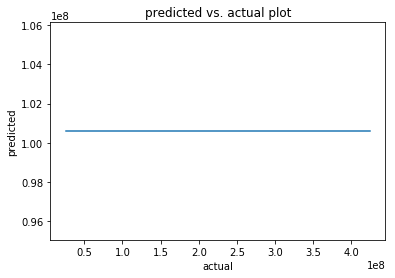

In [78]:
# how does model do at predicting y? define y_pred and plot predictions against actual y  
y_pred=results.predict(X)

plt.plot(y,y_pred)
plt.title('predicted vs. actual plot')
plt.xlabel('actual')
plt.ylabel('predicted')

histogram of residuals


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


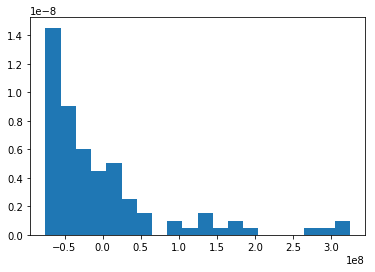

In [79]:
# plot histogram of residuals - they look right skewed around 0. This is probably because the actual values 
# are close to the actual mean of 0. The outliers to the right are probably movies that had huge boxoffice returns
residuals = y-y_pred
plt.hist(residuals, bins=20, normed=True)
print ('histogram of residuals')

## challenge2
- Add one continuous (numeric) predictor variable to model from part 1. I chose to add Budget. 

In [80]:
X2=pd.DataFrame()
X2['constant']=[1]*100
X2['Budget']=df['Budget']
y=df['DomesticTotalGross']


In [81]:
# OLS model summary 
m2=sm.OLS(y,X2,missing='drop')
results2=m2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Mon, 15 Oct 2018   Prob (F-statistic):           6.80e-08
Time:                        15:58:08   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant     4.44e+07   1.27e+07      3.504      0.001    1.92e+07    6.96e+07
Budget         0.7846      0.133      5.901      0.000       0.520       1.049
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     1.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'predicted')

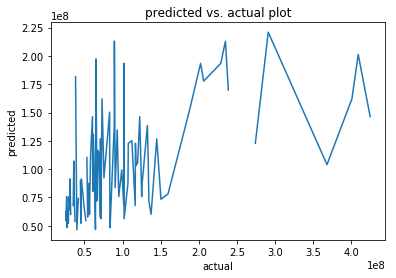

In [82]:
# define y_pred as the model prediction of y and plot against actual y
y_pred=results2.predict(X2)

plt.plot(y,y_pred)
plt.title('predicted vs. actual plot')
plt.xlabel('actual')
plt.ylabel('predicted')

Text(0,0.5,'residuals')

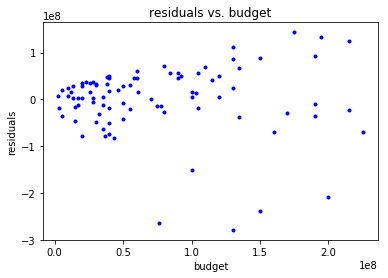

In [83]:
# find residuals 
residuals=y_pred - y

# plot resiudals vs. budget parameter
plt.plot(X2['Budget'],residuals,'b.')
plt.title('residuals vs. budget')
plt.xlabel('budget')
plt.ylabel('residuals')

## challenge3 
- Add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). I chose to add Rating as my categorical feature

In [84]:
X3=pd.DataFrame()
X3['constant']=[1]*100
X3['G'] = (df['Rating'] == 'G').astype(int)
X3['PG'] = (df['Rating'] == 'PG').astype(int)
X3['PG13'] = (df['Rating'] == 'PG13').astype(int)
X3['R'] = (df['Rating'] == 'R').astype(int)

In [85]:
# OLS model summary 
m3=sm.OLS(y,X3)
results3=m3.fit()
results3.summary()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encounte

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     3.924
Date:                Mon, 15 Oct 2018   Prob (F-statistic):             0.0109
Time:                        15:58:10   Log-Likelihood:                -1964.2
No. Observations:                 100   AIC:                             3936.
Df Residuals:                      96   BIC:                             3947.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    1.114e+08   1.22e+07      9.122      0.000    8.72e+07    1.36e+08
G            1.57e+08   8.47e+07      1.855      0.067    -1.1e+07    3.25e+08
PG          1.969e+07   2.48e+07      0.792      0.430   -2.96e+07     6.9e+07
PG13                0          0        nan        nan           0           0
R          -4.156e+07   1.84e+07     -2.257      0.026   -7.81e+07   -5.01e+06
==============================================================================
Omnibus:                       46.897   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.261
Skew:                           1.826   Prob(JB):                     1.88e-24
Kurtosis:                       6.589   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## challenge4
- Add more features and/or transform existing features. I include runtime and budget here 

In [86]:
X4=pd.DataFrame()
X4['constant']=[1]*100
X4['Budget']=df['Budget']
X4['Runtime']=df['Runtime']


In [87]:
# OLS model summary
m4=sm.OLS(y,X4,missing='drop')
results4=m4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     17.63
Date:                Mon, 15 Oct 2018   Prob (F-statistic):           3.83e-07
Time:                        15:58:11   Log-Likelihood:                -1737.7
No. Observations:                  89   AIC:                             3481.
Df Residuals:                      86   BIC:                             3489.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    5.731e+06   5.13e+07      0.112      0.911   -9.62e+07    1.08e+08
Budget         0.7456      0.142      5.237      0.000       0.463       1.029
Runtime     3.695e+05   4.75e+05      0.778      0.439   -5.74e+05    1.31e+06
==============================================================================
Omnibus:                       40.192   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.831
Skew:                           1.600   Prob(JB):                     7.72e-23
Kurtosis:                       7.149   Cond. No.                     6.21e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## challenge5
- Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [88]:
# split X into 75% training set, 25% test set. I use the feature matrix X4 from part 4 of this problem
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size = 0.25)


In [89]:
# OLS model summary
m5=sm.OLS(y_train, X_train, missing='drop')
results5=m5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     10.70
Date:                Mon, 15 Oct 2018   Prob (F-statistic):           9.63e-05
Time:                        15:58:13   Log-Likelihood:                -1335.3
No. Observations:                  68   AIC:                             2677.
Df Residuals:                      65   BIC:                             2683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    1.901e+07   6.55e+07      0.290      0.772   -1.12e+08     1.5e+08
Budget         0.7228      0.178      4.071      0.000       0.368       1.077
Runtime     3.028e+05   6.11e+05      0.495      0.622   -9.18e+05    1.52e+06
==============================================================================
Omnibus:                       26.323   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.454
Skew:                           1.419   Prob(JB):                     2.22e-10
Kurtosis:                       5.762   Cond. No.                     6.77e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.77e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
# define y_pred and predict on test set with the prediction model 
y_pred=results5.predict(X_test)

Text(0,0.5,'predicted')

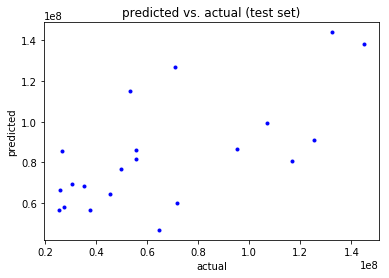

In [91]:
# plot y that the model predicts against the actual y
plt.plot(y_test, y_pred, 'b.')
plt.title('predicted vs. actual (test set)')
plt.xlabel('actual')
plt.ylabel('predicted')

## CHALLENGE 6

## challenge1
- Generate (fake) data that is linearly related to log(x). It is of the form B0 + B1*log(x) + epsilon

In [162]:
import pandas as pd 
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math 
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
# generate data and and set paramaters using random generator
x = [x/20. for x in range(1, 500, 1)]
b0 = -20
b1 = .85
y = [b0 + b1 * math.log(n) + random.random() for n in x]
my_data1 = pd.DataFrame({'y':y, 'x':x})

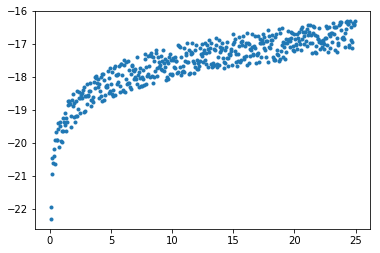

In [164]:
plt.plot(x,y,'.')

In [165]:
# create constant columns of 1 and quadratic column
my_data1['constant']=1
my_data1['x2'] = my_data1['x']**2


In [166]:
# degree 2 polynomial OLS model summary
poly = smf.ols(formula = 'y ~ x2', data=my_data1).fit()
y_pred = poly.predict(my_data1[['constant', 'x2']])
poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     628.9
Date:                Mon, 15 Oct 2018   Prob (F-statistic):           2.67e-90
Time:                        16:02:12   Log-Likelihood:                -442.40
No. Observations:                 499   AIC:                             888.8
Df Residuals:                     497   BIC:                             897.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.3433      0.040   -463.977      0.000     -18.421     -18.266
x2             0.0036      0.000     25.078      0.000       0.003       0.004
==============================================================================
Omnibus:                      244.595   Durbin-Watson:                   0.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1734.069
Skew:                          -2.025   Prob(JB):                         0.00
Kurtosis:                      11.186   Cond. No.                         419.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

quadratic fit model


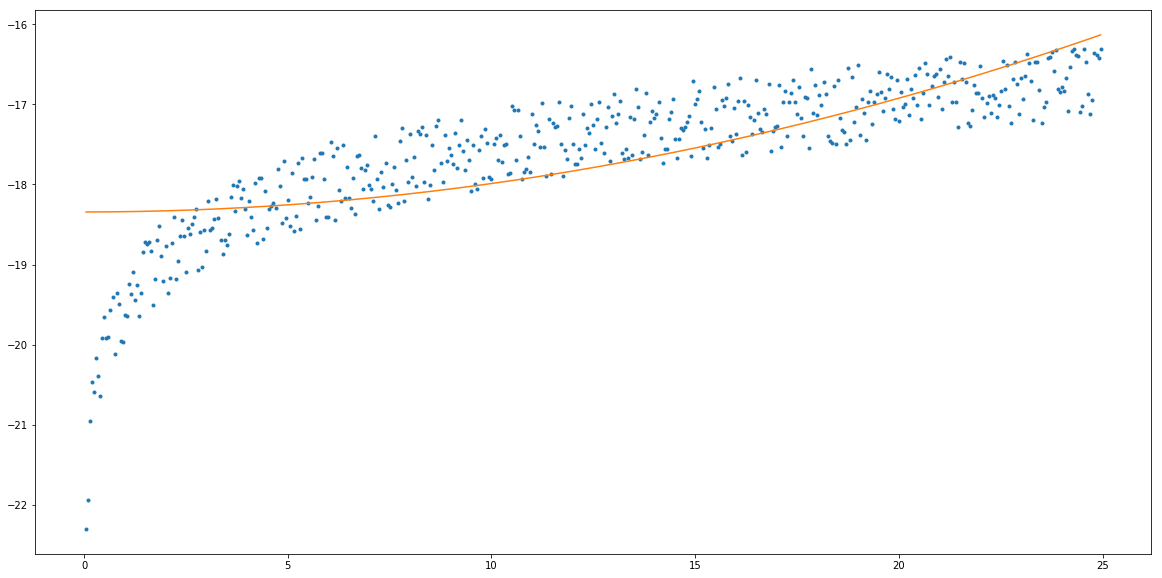

In [167]:
plt.figure(figsize=(20,10))
plt.plot(my_data1['x'], my_data1['y'], '.', my_data1['x'], y_pred)
print ('quadratic fit model')

In [168]:
# create logarithmic column for data 
my_data1['logx']=my_data1['x'].apply(math.log,1)

In [169]:
# log model OLS summary 
log=smf.ols(formula = 'y ~ logx', data=my_data1).fit()
y_pred = log.predict(my_data1[['constant', 'logx']])
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     4230.
Date:                Mon, 15 Oct 2018   Prob (F-statistic):          3.01e-245
Time:                        16:02:14   Log-Likelihood:                -84.419
No. Observations:                 499   AIC:                             172.8
Df Residuals:                     497   BIC:                             181.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5120      0.032   -609.203      0.000     -19.575     -19.449
logx           0.8576      0.013     65.041      0.000       0.832       0.883
==============================================================================
Omnibus:                      278.291   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.342
Skew:                          -0.061   Prob(JB):                     4.25e-07
Kurtosis:                       1.818   Cond. No.                         6.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

log fit model


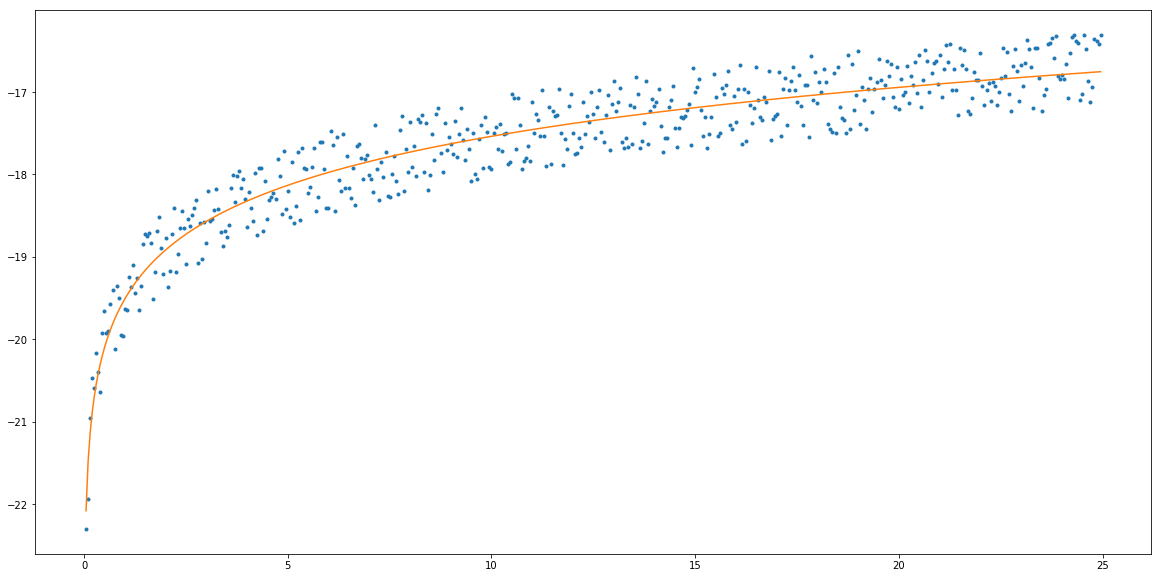

In [170]:
# plot 
plt.figure(figsize=(20,10))
plt.plot(my_data1['x'],my_data1['y'], '.', my_data1['x'], y_pred)
print ('log fit model')

## challenge2
- Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`

In [171]:
# generate data and and set paramaters using random generator
x = [x/20. for x in range(1, 500, 1)]
b0 = -30
b1 = 1.56
b2 = 0.005
y = [b0 + b1*n + b2*(n**2) + random.random() for n in x]
my_data2 = pd.DataFrame({'y':y, 'x':x})


In [172]:
# create constant columns of 1 and quadratic column
my_data2['constant']=1
my_data2['x2'] = my_data2['x']**2


In [173]:
# split X into 75% training set, 25% test set

X_train, X_test, y_train, y_test = train_test_split(my_data2[['constant','x','x2']], my_data2['y'], test_size = 0.25)


In [174]:
# OLS model summary 
m = sm.OLS(y_train, X_train)
results=m.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.080e+05
Date:                Mon, 15 Oct 2018   Prob (F-statistic):               0.00
Time:                        16:02:16   Log-Likelihood:                -75.848
No. Observations:                 374   AIC:                             157.7
Df Residuals:                     371   BIC:                             169.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant     -29.5020      0.048   -612.778      0.000     -29.597     -29.407
x              1.5601      0.009    175.435      0.000       1.543       1.578
x2             0.0050      0.000     14.682      0.000       0.004       0.006
==============================================================================
Omnibus:                      219.915   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.510
Skew:                           0.009   Prob(JB):                     1.29e-05
Kurtosis:                       1.798   Cond. No.                         893.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
# define predictions on training set 
y_train_pred = results.predict(X_train)

In [176]:
from sklearn.metrics import mean_squared_error

In [177]:
mean_squared_error(y_train_pred, y_train)


0.08783690463796966

In [178]:
## see how model does on test set
y_test_pred = results.predict(X_test)
mean_squared_error(y_test_pred, y_test)

0.08302432205203003

## challenge3
- For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error
 * test error
 * R squared
 * AIC


In [179]:
my_data2 = pd.DataFrame({'y':y, 'x':x})


In [180]:
def poly_fit(df, order):
    columns = []
    for c in range(0,order+1):
        column = 'x' + str(c)
        columns.append(column)
        df[column] = df['x']**c
        
    X = df[columns]
    y = df['y']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    m = sm.OLS(y_train, X_train)
    results=m.fit()

    y_train_pred = results.predict(X_train)
    error_train = mean_squared_error(y_train, y_train_pred)
    
    y_test_pred = results.predict(X_test)
    error_test = mean_squared_error(y_test, y_test_pred)
    
    return [error_train, error_test, results.rsquared, results.aic]


In [181]:
order=range(0,8)
poly_fit_output=[poly_fit(my_data2,c) for c in order]
print(poly_fit_output)

[[152.21452091865197, 133.84493368452047, -2.220446049250313e-16, 2942.824799877232], [0.13672780757393407, 0.14364616667216054, 0.9990791967239391, 321.1946101597473], [0.08407925912606974, 0.09399728366439027, 0.9994265922313043, 141.34375670555858], [0.08330655161351659, 0.09627361435643271, 0.9994474921504918, 139.89072013931514], [0.08130823584484172, 0.10238924793214337, 0.9994477271447751, 132.81004368231527], [0.08923074217603431, 0.07856480086182487, 0.9993822647542774, 169.5839316640412], [0.08354994073188429, 0.09494551070081803, 0.999448636135555, 146.98180857765738], [0.08497010344719767, 0.09107856716650588, 0.9994127410869456, 155.28555045365079]]


In [182]:

error_train = [c[0] for c in poly_fit_output]
error_test = [c[1] for c in poly_fit_output]
R2 = [c[2] for c in poly_fit_output]
AIC = [c[3] for c in poly_fit_output]

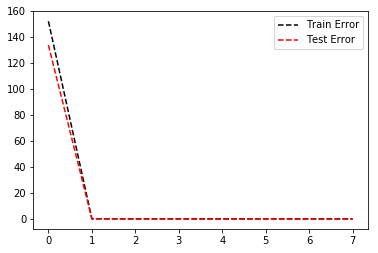

In [183]:
# plot train error and test error 
plt.figure(figsize=(6,4))
plt.plot(order, error_train, 'k--', label = 'Train Error', )
plt.plot(order, error_test, 'r--', label = 'Test Error')
plt.legend()

Text(0,0.5,'r^2')

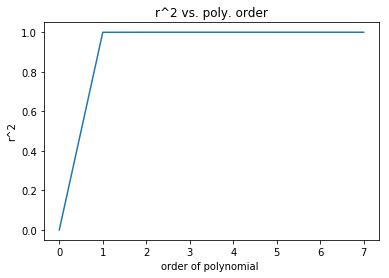

In [184]:
# plot r squared for the different 8 polynomial orders
plt.figure(figsize=(6,4))
plt.plot(order, R2)
plt.title('r^2 vs. poly. order')
plt.xlabel('order of polynomial ')
plt.ylabel('r^2')

Text(0,0.5,'AIC')

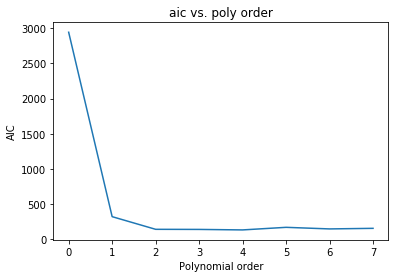

In [185]:
# plot AIC for the different 8 polynomial orders
plt.figure(figsize=(6,4))
plt.plot(order, AIC)
plt.title('aic vs. poly order')
plt.xlabel('Polynomial order')
plt.ylabel('AIC')

## challenge4
- For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.


In [186]:
my_data2 = pd.DataFrame({'y':y, 'x':x})


In [187]:
def calculate_reg_error(df,m):
    # only go up to m data points and then stop looking
    df=df[:m]
    
    X=df.drop(['y'],1)
    y=df['y']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    m = sm.OLS(y_train, X_train)
    results=m.fit()

    
    y_train_pred = results.predict(X_train)
    error_train = mean_squared_error(y_train, y_train_pred)
    
    y_test_pred = results.predict(X_test)
    error_test = mean_squared_error(y_test, y_test_pred)
    
    return [error_train, error_test]


In [203]:
m=range(5,101,5)
reg_error_output=[calculate_reg_error(my_data2,c) for c in m]
#print(reg_error_output)

In [204]:

error_train = [c[0] for c in reg_error_output]
error_test = [c[1] for c in reg_error_output]


Text(0,0.5,'error')

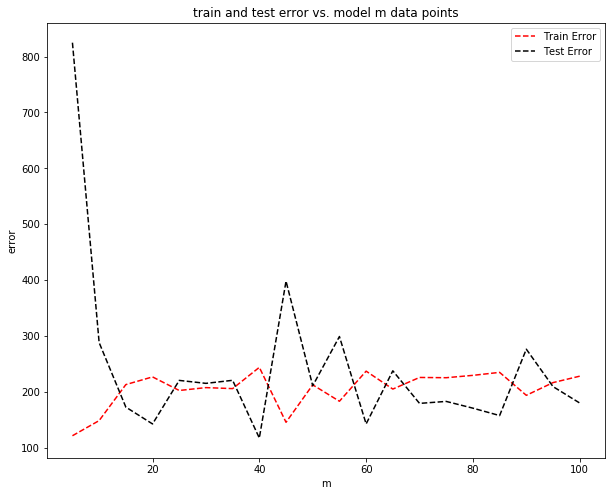

In [205]:
plt.figure(figsize=(10,8))
plt.plot(m, error_train, 'r--', label = 'Train Error')
plt.plot(m, error_test, 'k--', label = "Test Error")
plt.legend()
plt.title('train and test error vs. model m data points')
plt.xlabel('m')
plt.ylabel('error')
